
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks
## Due December 3, 2023 by 11:59 PM
### <span style="color: red">David Petkov</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

In [2]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

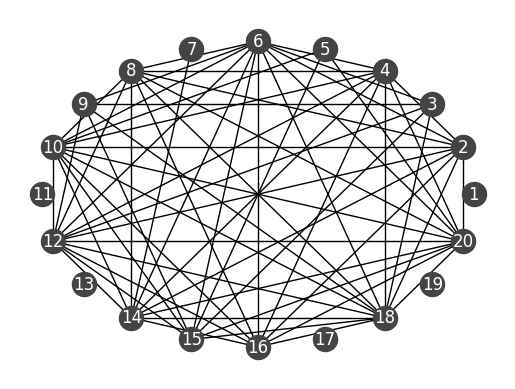

In [4]:
# Code for Problem 1
G = nx.Graph() # Create graph
V = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # Create list of 20 numbers
List = [] # Empty list which will have data added to it later
G.add_nodes_from(V) # Make each number a node

'''
For each number in list V, compare it to every other number on the list and check for the greatest common denominator.
To prevent the same comparison being made twice, there is a for loop within the original for loop to ensure we have no duplicate results.
Also, due to the for loops, I needed to add a condition that skips the comparison when 2 numbers from the list are compared and they are the same.
If the GCD is greater than 1, the two numbers are added to a list, then that list becomes and element of the original list.
Finally, all the undirected edges are created from the list of lists, where each sub-list is a node pair between numbers with a GCD > 1.
'''
for i in range(0,20):
  for j in range (i,20):
    if i == j:
      pass
    elif math.gcd(V[i], V[j])>1:
      fList = []
      a=V[i]
      fList.append(a)
      b=V[j]
      fList.append(b)
      List.append(fList)

G.add_edges_from(List)
bigger_graph,ax = plt.subplots(1,1)

nx.draw(G, ax=ax, pos=nx.circular_layout(G), with_labels=True, node_color='#444444',font_color="white")

## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

## Answer to Problem 2

a) 6, a 2x3 or a 3x2 graph where each node on the left is connected to each on the right.

b) 3, similar graphs as part A, in my example 2x3, node 1 connects to two nodes, node 2 connects to one node.

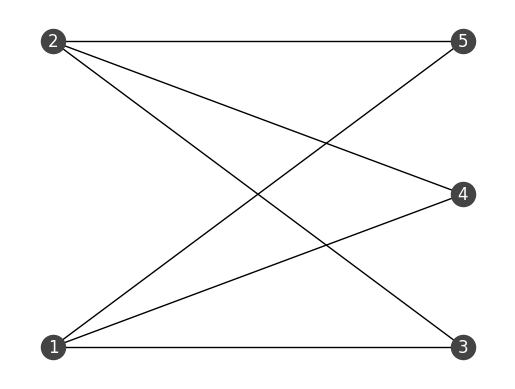

In [ ]:
# Code for problem 2a
G = nx.Graph() # Create graph
G.add_nodes_from([1,2,3,4,5]) # Create nodes
G.add_edges_from([(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]) # Create edges


# Plot graph
bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2]),with_labels=True, node_color='#444444',font_color="white")

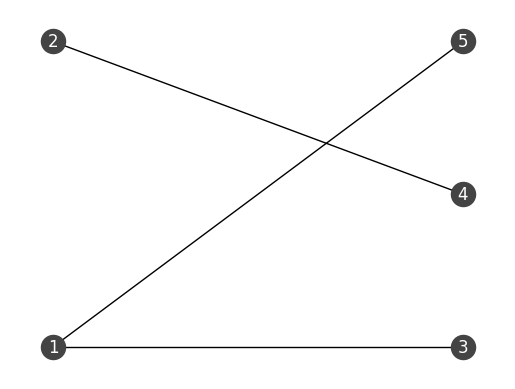

In [ ]:
# Code for problem 2b, similar to 2a
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,3),(1,5),(2,4)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2]),with_labels=True, node_color='#444444',font_color="white")

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes.

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$.

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

## Answer to Problem 3

Code for the problem is below.

The trend observed is that as the probability increases, so do the eigenvalues. By the time the probability reaches 100%, or p=1, 9 eigenvalues will be 10, the last will be 0(shown as a small number e-16 due to a rounding error).

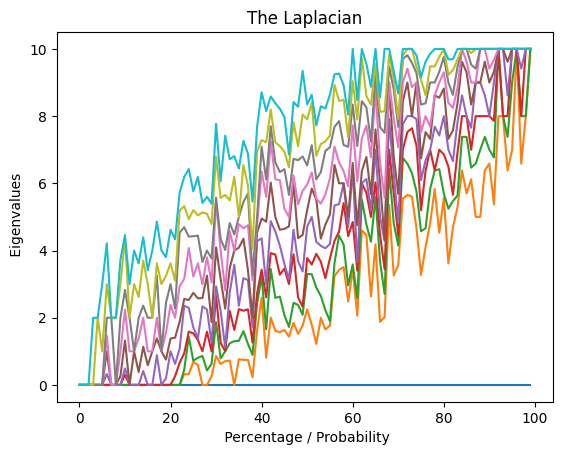

In [10]:
# Code for problem 3
List = [] # Create empty list
for p in range(0,100): # Need 100 values for p
  p = p/100 # Divide by 100 to get 1/100th values
  newList = [] # Create/empty newList every time the loop is run
  G = nx.fast_gnp_random_graph(10,p) # Create graph with 10 nodes and probability of p of there being connection between nodes
  L = nx.laplacian_matrix(G).todense() # Calculate Laplacian of the matrix
  eigs = np.linalg.eigvals(L) # Calculate eigenvalues
  eigs = np.sort(eigs) # Sort eigenvalues
  e= eigs.tolist() # Add eigenvalues to list
  List.append(e) # Append the original list with a list element.

# Plot characteristics
plt.title("The Laplacian")
plt.xlabel(" Percentage / Probability")
plt.ylabel(" Eigenvalues")
plt.plot(List)
plt.show()

In [ ]:
# A completely connected graph

G = nx.fast_gnp_random_graph(10,1)
L = nx.laplacian_matrix(G).todense()
eigs = np.linalg.eigvals(L)
eigs = np.sort(eigs)
eigs

array([-4.4408921e-16,  1.0000000e+01,  1.0000000e+01,  1.0000000e+01,
        1.0000000e+01,  1.0000000e+01,  1.0000000e+01,  1.0000000e+01,
        1.0000000e+01,  1.0000000e+01])

## 4. Hamiltonian Circuits

Consider the set of square grid graphs like those returned by the function `nx.grid_graph(dim=[n,n])` where $n>0$. Show that these graphs always have a Hamilton Circuit when $n$ is even. Use networkx to draw the square grid graph for $n=6$, highlighting a Hamilton cycle.

## Answer to Problem 4

Below are examples of why an $n$ square grid has a Hamiltonian path only when $n$ is even.

For a square grid with sides $n$, the graph is Hamiltonian if $n^2$ is even. Therefore, any even $n$ will always have a hamiltonian path, but not odd ones.

The program below the picture is a demonstration of an approximate Hamiltonian path for a 6x6 square grid.

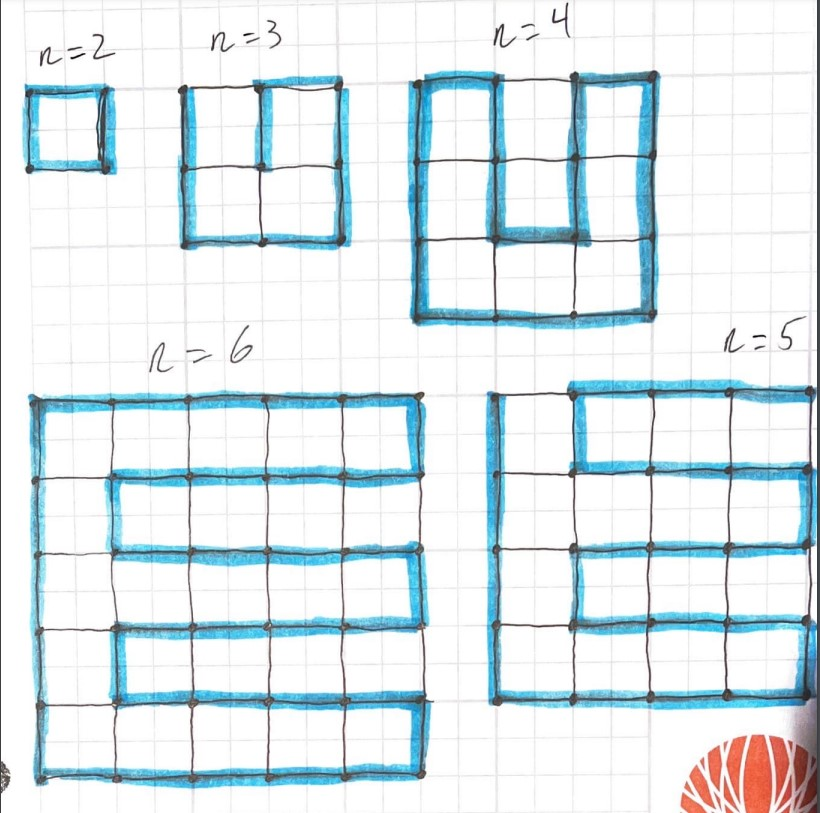

In [18]:
# Code for Problem 4 for an approximate Hamiltonian path

# Subroutines for finding the approximate Hamilton Cycle

route = [] # Global variable for storing the nodes visited during depth first search

def spanning_tree(G):

    """Returns a spanning tree of the graph G if one exists, otherwise
       raises an exception."""

    # Initialize
    V = {list(G.nodes)[0]}
    E = set({})

    while len(V) < len(G.nodes):

        # find a node u in V that has a neighbor v in notV
        v = None
        for u in V:
            nbrs = set(G.neighbors(u)) - V
            if len(nbrs) > 0:
                v = nbrs.pop()
                break

        # If no v is found, then return an exception
        if v == None:
            raise Exception("Graph is not connected")

        # Add that node to V
        V.add(v)

        # Add the edge uv to E
        E.add((u,v))

    # Build the graph
    T = nx.Graph()
    T.add_nodes_from(V)
    T.add_edges_from(E)

    return T

def DFS(T):
    """Given a tree T, do a depth first search starting
       with the first node. Returns a list of nodes visited,
       including repeats of nodes revisited when backtracking."""
    global route
    route = []
    for v in T.nodes:
        T.nodes[v]["visited"] = False;
    v = list(T.nodes)[0]
    DFS_aux(T,v)
    return route

def DFS_aux(T,v):
    """Auxilliary method for depth first search"""
    global route
    route.append(v)
    T.nodes[v]["visited"] = True
    children = [u for u in T.neighbors(v) if not T.nodes[u]["visited"]]
    for child in children:
        DFS_aux(T,child)
        route.append(v)

def shorten(G,route):
    """Given a graph G and a route, shorten the route as much
       as possible."""
    new_route = shorten_by_one(G,route)
    while len(new_route) < len(route):
        route = new_route
        new_route = shorten_by_one(G,route)
    return new_route

def shorten_by_one(G,route):
    """Given a graph G and a sequence of nodes in route, try to find a
       repeated node that can be skipped. Return the new route if such a
       node can be found, or the given route if not."""
    repeats = [v for v in route[1:-1] if route.count(v) > 1]
    random.shuffle(repeats) # avoids always picking 0
    for r in repeats:
        for i,v in enumerate(route):
            if route[i] == r and i != 0 and i != len(route) - 1:
                x,y = route[i-1], route[i+1]
                if G.has_edge(x,y):
                    return route[0:i] + route[i+1:]
    return route

def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

Route has length 70


[(4, 0), (5, 0), (4, 0), (4, 1), (3, 1), (3, 0), (3, 1), (2, 1), (1, 1), (1, 2
), (1, 3), (1, 4), (1, 3), (1, 2), (2, 2), (2, 3), (2, 2), (1, 2), (1, 1), (0,
 1), (0, 2), (0, 3), (0, 2), (0, 1), (1, 1), (1, 0), (2, 0), (1, 0), (0, 0), (
1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 1), (4, 1), (4, 2), (4, 3), (3, 3),
 (3, 4), (3, 5), (4, 5), (3, 5), (3, 4), (2, 4), (2, 5), (1, 5), (0, 5), (0, 4
), (0, 5), (1, 5), (2, 5), (2, 4), (3, 4), (3, 3), (4, 3), (5, 3), (5, 4), (5,
 5), (5, 4), (5, 3), (4, 3), (4, 4), (4, 3), (4, 2), (4, 1), (5, 1), (5, 2), (
5, 1), (4, 1), (4, 0)]

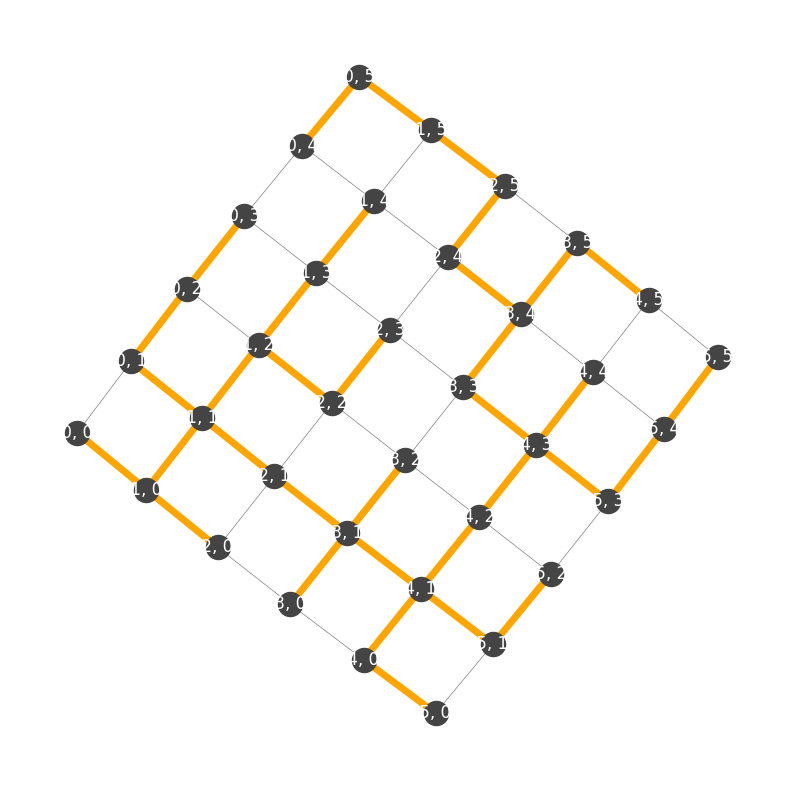

In [20]:
# Create and plot graph
n=6
G = nx.grid_graph(dim=[n,n]) # Generate square grid with n x n nodes

T = spanning_tree(G)# Find a spanning tree

route = shorten(G,DFS(T))# Do depth first search and shortening

R = route_graph(route)# Turn the result into a networkx graph

# Draw the graph with the circuit highlighted
fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if R.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if R.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
        ax=ax,
        with_labels=True,
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

print("Route has length %d" % (len(route)-1))
if (len(route)-1) == n:
    print("Optimal!!!")
route

## 5. The Page Rank Algorithm

For the following problem, use the `networkx` `pagerank` function or find the eigenvector of the graph as a Markov Process corresponding to the eigenvector 1. Use undirected graphs.

a) Find a 10 node, connected graph in which all nodes are ranked equally or explain why such a graph does not exist.

b) Find a 10 node, connected graph in which all nodes are ranked differently or explain why such a graph does not exist.

c) Find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same, but different from nodes in $A$. Or explain why such a graph does not exist.

## Problem 5a

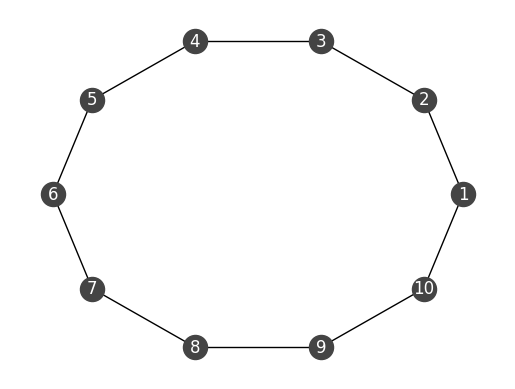

In [11]:
# Code for problem 5a
G = nx.Graph() # Create graph
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10]) # Create nodes
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)]) # Create edges

#Plot
graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")

In [12]:
# Show ranks of all nodes for problem 5a

# Check each value in the list with the first element, if they are all equal, it will pass the for loop.
rank = nx.pagerank(G)
rankList=list(rank.values())
for i in range(1,10):
  if rankList[0]==rankList[i]:
    pass
  else:
    print("All nodes do not have equal rank")

print("Node ranks are all equal:")
rankList

Node ranks are all equal:


[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

## Problem 5b

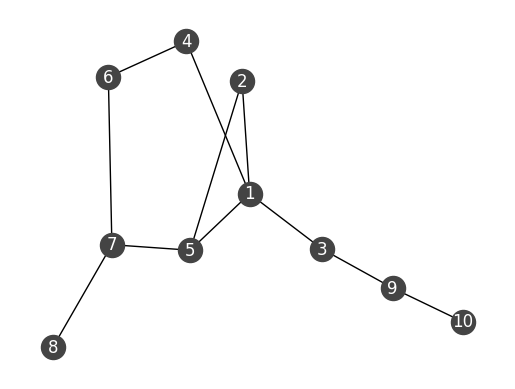

In [13]:
# Code for problem 5b, similar to 5a
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
H.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,5),(4,6),(6,7),(7,8),(5,7),(9,3),(10,9)])

graph,ax = plt.subplots(1,1)
nx.draw(H, ax=ax, pos=nx.kamada_kawai_layout(H),with_labels=True, node_color='#444444',font_color="white")

In [14]:
# Show ranks of all nodes for problem 5b

# Check each value in the list with others, without repeating any operation. If there is any equality, it will print out the message.

rank = nx.pagerank(H)
rankList1=list(rank.values())
for i in range(0,10):
  for j in range(i,10):
    if i == j:
      pass # Don't want to do anything if comparing an element to itself
    elif rankList1[i]==rankList1[j]:
      print("There is an equality in rank amongst nodes")

print("No two node ranks are equal:")
rankList1

No two node ranks are equal:


[0.16417599990557716, 0.08495093601381401, 0.09530103464179067, 0.088251633377
33236, 0.12375254000341794, 0.09026745978298129, 0.13327389887064237, 0.052760
82416925468, 0.10685238019060443, 0.06041329304458501]

## Problem 5c

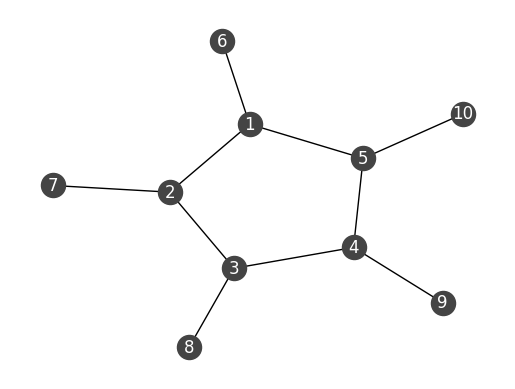

In [15]:
# Code for problem 5c, similar to 5a and 5b
# Set A is [1,2,3,4,5] and B is [6,7,8,9,10], but will be included in the same list in the code for simplicity

F = nx.Graph()
F.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
F.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1),(6,1),(7,2),(8,3),(9,4),(10,5)])

graph,ax = plt.subplots(1,1)
nx.draw(F, ax=ax, pos=nx.kamada_kawai_layout(F),with_labels=True, node_color='#444444',font_color="white")

In [16]:
# Show ranks for lists A and B are all the same for their own respective elements, but not when compared to the other list.

rank = nx.pagerank(F)
rankList=list(rank.values())

#Set A
for i in range(1,5):
  if rankList[0]==rankList[i]:
    pass
  else:
    print("Nodes in set A do not have equal rank")

#Set B
for i in range(5,10):
  if rankList[5]==rankList[i]:
    pass
  else:
    print("Nodes in set B do not have equal rank")

print("Node ranks are all equal for their respective sets:")
print( "Set A: " ,rankList[0:5])
print( "Set B: " ,rankList[5:10])

Node ranks are all equal for their respective sets:
Set A:  [0.1441556969364922, 0.1441556969364922, 0.1441556969364922, 0.1441556969364922, 0.1441556969364922]
Set B:  [0.055844303063507864, 0.055844303063507864, 0.055844303063507864, 0.055844303063507864, 0.055844303063507864]
